


---


**COMM055 COURSEWORK - A COMPARISON STUDY ON MACHINE LEARNING ALGORITHMS**




---



# **MODEL DEVELOPMENT, EVALUATION AND COMPARISONS ON SUPERVISED MACHINE LEARNING ALGORITHMS - CLASSIFICATION**


---


This notebook focuses on the comparison study on **Supervised ML Algorithms** and various Data Mining techniques.

**On Datasets:** IBM Attrition, Mushroom Classification

**Problem Type:** Classification

**ML Algorithms:** Logistic Regression, Decision Trees, Perceptron, Multi-Layer Perceptron, Support-Vector Machines

**Performance Metrics:** ROC curve, Cross-Validation, Accuracy Score, Confusion Matrix



---


**Contents:**

1. Data Pre-processing

   **Before Parameter Tuning**
2. Python Functions for Modelling, Performance Metrics and Parameter Tuning
3. Evaluation and Comparison of the default models

   **After Parameter Tuning**
4. Parameter Optimization (Manual/Systematic Tuning) on developed models
5. Evaluation and Comparison of the (Manual/Systematic Tuning) optimized models
6. Parameter Optimization (Automated Tuning) on developed models
7. Evaluation and Comparison of the optimized models within and across the datasets

  **Conclusion**
8. Proposing the best and worst performing Classification Algorithms on "IBM Attrition" and "Mushroom Classification" Datasets



---




# **1. Data Pre-processing**


## **1.1 On IBM Attrition**

---


1.1.1 Encoding Categorical Features

1.1.2 Train-Validation-Test Split


---



### 1.1.1 Encoding Categorical Features

In [ ]:
# Importing the cleaned dataset downloaded from the DPU.ipynb file
# Before running this code, please upload the dataset. 
# To upload the dataset go to Files(the folder icon to the left)> Upload> choose "ibmData.csv" dataset from your local drive
# Importing pandas library
# Importing preprocessing from sklearn to preprocess the dataset
# Reading the CSV file using pandas.read_csv function and storing in ibmData variable

import pandas as pd
from sklearn import preprocessing
ibmData = pd.read_csv('/content/ibmData.csv')

In [ ]:
# Putting all the input variables in one dataframe(IbmX) and the output variable in another(Ibmy)

IbmX = ibmData.drop('Attrition', axis=1)
Ibmy = ibmData['Attrition']

print(IbmX)
print(Ibmy)


      Age     BusinessTravel  ...  YearsSinceLastPromotion YearsWithCurrManager
0      41      Travel_Rarely  ...                        0                    5
1      49  Travel_Frequently  ...                        1                    7
2      37      Travel_Rarely  ...                        0                    0
3      33  Travel_Frequently  ...                        3                    0
4      27      Travel_Rarely  ...                        2                    2
...   ...                ...  ...                      ...                  ...
1465   36  Travel_Frequently  ...                        0                    3
1466   39      Travel_Rarely  ...                        1                    7
1467   27      Travel_Rarely  ...                        0                    3
1468   49  Travel_Frequently  ...                        0                    8
1469   34      Travel_Rarely  ...                        1                    2

[1470 rows x 29 columns]
0       Yes
1 

**Comments:** The dataframe has been divided into:

IbmX - with all the input variables/columns

Ibmy - with the target variable

In [ ]:
# Importing LabelEncoder from sklearn.preprocessing to encode the categorical labels to "1" and "0"
# The target variable 'Attrition' has categorical values 'Yes' and 'No', converting these to '1' and '0'
#Importing numpy library to check for the unique values in the Target Column
from sklearn.preprocessing import LabelEncoder
import numpy as np

print("Before Label Encoding: \n", Ibmy.head())
Ibmy_le = LabelEncoder()
# Yes -> 1 and No -> 0
Ibmy = Ibmy_le.fit_transform(Ibmy.values)
print(100*'-')
print("After Label Encoding: \n", Ibmy)
print('No and Yes are labelled as:', np.unique(Ibmy))

Before Label Encoding: 
 0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object
----------------------------------------------------------------------------------------------------
After Label Encoding: 
 [1 0 1 ... 0 0 0]
No and Yes are labelled as: [0 1]


**Comments:** Shows that the classes "Yes" and "No" are labelled as 1 and 0

In [ ]:
# Get the dummy variables for the categorical feature
# Add the results to the original dataframe
# Drop the original categorical variables as dummies are already created

import numpy as np

ibm_category = IbmX.select_dtypes(exclude = [np.number])
ibm_category = ibm_category.columns.values

ibmDummies = pd.get_dummies(IbmX[ibm_category])

IbmX_onehot = pd.concat([IbmX, ibmDummies], axis = 1)
IbmX_onehot.drop(ibm_category, axis = 1, inplace = True)
IbmX_onehot.head(5)
IbmX = IbmX_onehot
IbmX

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,1102,1,2,2,94,3,2,4,19479,8,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,279,8,1,3,61,2,2,2,24907,1,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,1373,2,2,4,92,2,1,3,2396,6,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,1392,3,4,4,56,3,1,3,23159,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,591,2,1,1,40,3,1,2,16632,9,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,12290,4,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1466,39,613,6,1,4,42,2,3,1,21457,4,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1467,27,155,4,3,2,87,4,2,2,5174,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1468,49,1023,2,3,4,63,2,2,2,13243,2,14,3,4,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0


**Comments:** After one hot encoding, the number of columns changed from 28 to 50, as the n values in one categorical column are converted to n columns. (i.e If one categorical column has three values then it gets converted to three columns with binary values 0 and 1)

### 1.1.2 Train-Validation-Test Split

In [ ]:
# To check if the classes are balanced in the target variable
print('Output variable("Attrition") labels counts:', np.bincount(Ibmy))

Output variable("Attrition") labels counts: [1233  237]


**Comments:** The output variable 'Attrition' is imbalanced with No = 1233, Yes = 237. Hence we stratify the train and test split so that the ratio of yes and no in train and test are equal

In [ ]:
# Importing train_test_split from sklearn.model_selection to split the dataset to train, validation and test sets.
from sklearn.model_selection import train_test_split

# Splitting the dataset into Train & Validation(85%) and Test(15%)
IbmX_tv, IbmX_test, Ibmy_tv, Ibmy_test = train_test_split(IbmX, Ibmy, test_size=0.15, random_state=0, stratify=Ibmy)

In [ ]:
# To check if the label counts are split by the right ratio

print('Labels counts in y:', np.bincount(Ibmy))
print('Labels counts in y_train:', np.bincount(Ibmy_tv))
print('Labels counts in y_test:', np.bincount(Ibmy_test))
ratio_train = np.bincount(Ibmy_tv)[0]/np.bincount(Ibmy_tv)[1]
print("Ratio of No and Yes in train set is 1:", ratio_train)
ratio_test = np.bincount(Ibmy_test)[0]/np.bincount(Ibmy_test)[1]
print("Ratio of No and Yes in test set is 1:", ratio_test)


Labels counts in y: [1233  237]
Labels counts in y_train: [1048  201]
Labels counts in y_test: [185  36]
Ratio of No and Yes in train set is 1: 5.213930348258707
Ratio of No and Yes in test set is 1: 5.138888888888889


**Comments:** The output shows that the stratify parameter of train_test_split has divided the train and test split in such a way that the Yes and No ratio is almost equal (No:Yes = 1:5)

In [ ]:
# Splitting the train data further into train(80%) and validation(20%)

IbmX_train, IbmX_val, Ibmy_train, Ibmy_val = train_test_split(IbmX_tv, Ibmy_tv, test_size=0.20, random_state=0, stratify = Ibmy_tv)

## **1.2 On Mushroom**

---


1.2.1 Encoding Categorical Features

1.2.2 Train-Validation-Test Split


---

### 1.2.1 Encoding Categorical Features

In [ ]:
# Importing the cleaned dataset downloaded from the DPU.ipynb file
# Before running this code, please upload the dataset. 
# To upload the dataset go to Files(the folder icon to the left)> Upload> choose "mushroomData.csv" dataset from your local drive
# Importing pandas library
# Importing preprocessing from sklearn to preprocess the dataset
# Reading the CSV file using pandas.read_csv function and storing in mushroomData variable

import pandas as pd
from sklearn import preprocessing
mushroomData = pd.read_csv('/content/mushroomData.csv')
#mushroomData = pd.read_csv('mushrooms.csv')

In [ ]:
# Putting all the input variables in one dataframe(mushroomX) and the output variable in another(mushroomy)

mushroomX = mushroomData.drop('class', axis=1)
mushroomy = mushroomData['class']

print(mushroomX)
print(mushroomy)


     cap-shape cap-surface cap-color  ... spore-print-color population habitat
0            x           s         n  ...                 k          s       u
1            x           s         y  ...                 n          n       g
2            b           s         w  ...                 n          n       m
3            x           y         w  ...                 k          s       u
4            x           s         g  ...                 n          a       g
...        ...         ...       ...  ...               ...        ...     ...
8119         k           s         n  ...                 b          c       l
8120         x           s         n  ...                 b          v       l
8121         f           s         n  ...                 b          c       l
8122         k           y         n  ...                 w          v       l
8123         x           s         n  ...                 o          c       l

[8124 rows x 20 columns]
0       p
1       e
2     

**Comments:** The dataframe has been divided into:

mushroomX - with all the input variables/columns

mushroomy - with the target variable

In [ ]:
# Importing LabelEncoder from sklearn.preprocessing to encode the categorical labels to "1" and "0"
# The target variable 'class' has categorical values 'p' and 'e', converting these to '1' and '0'
# Importing numpy library to check for the unique values in the Target Column
from sklearn.preprocessing import LabelEncoder
import numpy as np

print("Before Label Encoding: \n", mushroomy.head())
mushroomy_le = LabelEncoder()
# p -> 1 and e -> 0
mushroomy = mushroomy_le.fit_transform(mushroomy.values)
print(100*'-')
print("After Label Encoding: \n", mushroomy)
print("Edible('e') and Poisonous('p')  are labelled as:", np.unique(mushroomy))

Before Label Encoding: 
 0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object
----------------------------------------------------------------------------------------------------
After Label Encoding: 
 [1 0 0 ... 0 1 0]
Edible('e') and Poisonous('p')  are labelled as: [0 1]


**Comments:** Shows that the classes "e" and "p" are labelled as 0 and 1

In [ ]:
# LableEncoding categorical values in the dataset
# Importing OneHotEncoder from sklearn.preprocessing library to convert n categorical values to n binary values
# from sklearn.preprocessing import OneHotEncoder
# mushroomX_onehot = OneHotEncoder().fit_transform(mushroomX)
# print('Feature matrix size:',mushroomX.shape)

mushroomX_le = LabelEncoder()
for col in mushroomX.columns:
    mushroomX[col] = mushroomX_le.fit_transform(mushroomX[col])
 
mushroomX.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,2,2,7,7,2,1,0,3,0,1


**Comments:** After one hot encoding, the number of columns increased from 20 to 111, as the n values in one categorical column are converted to n columns leading to "Curse of Dimensionality". (i.e If one categorical column has three values then it gets converted to three columns with binary values 0 and 1)

**Action and Justification:** It was decided to go along with label encoding rather than one hot for two main reasons:

1. The computational time for 20 columns vs 111 columns would be considerably low thereby increasing the efficiency of the ML models

2. Trained models on onehot encoded mushroom dataset where all the algorithms returned an accuracy of 100% except for decision trees. And this wouldn't help us to sginificantly compare algorithms

**Insight:** Though Decision Trees gave less than 100% accuracy with onehot encoded data but with label encoded data the accuracy of the model on test set is 100%. This may be because of the number of splits a node has to make is considerably few with label encoded data(only 20 colums) compared to onehot encoded data(111 columns) as the tree grows

### 1.2.2 Train-Validation-Test Split

In [ ]:
# To check if the classes are balanced in the target variable
print('Output variable("class") labels counts:', np.bincount(mushroomy))

Output variable("class") labels counts: [4208 3916]


**Comments:** The output variable 'class' is slightly imbalanced with edible("e") = 4208, poisonous("p") = 3916. Hence we stratify the train and test split so that the ratio of e and p in train and test are equal

In [ ]:
# Importing train_test_split from sklearn.model_selection to split the dataset to train, validation and test sets.
from sklearn.model_selection import train_test_split

# Splitting the dataset into Train & Validation(85%) and Test(15%)
mushroomX_tv, mushroomX_test, mushroomy_tv, mushroomy_test = train_test_split(mushroomX, mushroomy, test_size=0.15, random_state=0, stratify=mushroomy)

In [ ]:
# To check if the label counts are splitted on the right ratio

print('Labels counts in y:', np.bincount(mushroomy))
print('Labels counts in y_train:', np.bincount(mushroomy_tv))
print('Labels counts in y_test:', np.bincount(mushroomy_test))
ratio_train = np.bincount(mushroomy_tv)[0]/np.bincount(mushroomy_tv)[1]
print("Ratio of p and e in train set is 1:", ratio_train)
ratio_test = np.bincount(mushroomy_test)[0]/np.bincount(mushroomy_test)[1]
print("Ratio of p and e in test set is 1:", ratio_test)


Labels counts in y: [4208 3916]
Labels counts in y_train: [3577 3328]
Labels counts in y_test: [631 588]
Ratio of p and e in train set is 1: 1.0748197115384615
Ratio of p and e in test set is 1: 1.0731292517006803


**Comments:** The output shows that the stratify parameter of train_test_split has divided the train and test split in such a way that the "p" and "e" ratio is almost equal (p:e = 1:1.07)

In [ ]:
# Splitting the train data further into train(80%) and validation(20%)

mushroomX_train, mushroomX_val, mushroomy_train, mushroomy_val = train_test_split(mushroomX_tv, mushroomy_tv, test_size=0.20, random_state=0, stratify = mushroomy_tv)

# **2. Functions for Fitting the models and Performance Metrics**

## 2.1 Modelling

In [ ]:
# Importing all the neccesssary libraries for modelling 
# Though some of these libraries are not used until the models are built in section 3 - its imported as few of these are needed inside the functions that are written in this section
# Logistic Regression and Perceptron from sklearn.linear_model
# MLPClassifier from sklearn.neural_network
# svm from sklearn
# Importing CalibratedClassifierCV as perceptron and SVM models doesnt have predict_proba
# GridSearchCV and RandomizedSearchCV to help with automated parameter tuning

from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.calibration import CalibratedClassifierCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Writing a function for fitting the five classification algorithm models
def models(X_train, y_train, y_test):
  bl = [0 for _ in range(len(y_test))]
  clf1 = lr.fit(X_train, y_train)
  clf2 = dt.fit(X_train, y_train)
  clf3 = slp
  clf3 = CalibratedClassifierCV(clf3).fit(X_train, y_train)
  clf4 = mlp.fit(X_train, y_train)
  clf5 = svm
  clf5 = CalibratedClassifierCV(clf5).fit(X_train, y_train)
  return bl, clf1, clf2, clf3, clf4, clf5


## 2.2 ROC Curve

In [ ]:
# Import roc_curve and roc_auc_score from sklearn.metrics to get the ROC and AUC scores
# Also import metrics from sklearn 
# Import pyplot from matplotlib to plot the ROC curve

from sklearn import metrics
from matplotlib import pyplot
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

#Creating a function for plotting ROC to call it many times in the further steps

def rocplot(X_test, y_test, X_train, y_train, data):
  bl, clf1, clf2, clf3, clf4, clf5 = models(X_train, y_train, y_test)
  # predict probabilities for different models
  lr_probs1 = clf1.predict_proba(X_test)
  lr_probs2 = clf2.predict_proba(X_test)
  lr_probs3 = clf3.predict_proba(X_test)
  lr_probs4 = clf4.predict_proba(X_test)
  lr_probs5 = clf5.predict_proba(X_test)

  # keep probabilities for the positive outcome only
  lr_probs1 = lr_probs1[:, 1]
  lr_probs2 = lr_probs2[:, 1]
  lr_probs3 = lr_probs3[:, 1]
  lr_probs4 = lr_probs4[:, 1]
  lr_probs5 = lr_probs5[:, 1]

  # calculate accuracy score for random prediction model
  bl_auc = roc_auc_score(y_test, bl)

  # calculate accuracy score different models
  lr_auc1 = roc_auc_score(y_test, lr_probs1)
  lr_auc2 = roc_auc_score(y_test, lr_probs2)
  lr_auc3 = roc_auc_score(y_test, lr_probs3)
  lr_auc4 = roc_auc_score(y_test, lr_probs4)
  lr_auc5 = roc_auc_score(y_test, lr_probs5)

  # summarize scores
  print(100*'-')
  print("The AUC scores for the default models trained on " + str(data) + " are as follows: ")
  print(100*'-')
  print('Baseline (random guess): ROC AUC=%.4f' % (bl_auc))
  print('Logistic Regression: ROC AUC=%.4f' % (lr_auc1))
  print('Decision Trees: ROC AUC=%.4f' % (lr_auc2))
  print('Perceptron: ROC AUC=%.4f' % (lr_auc3))
  print('MLP: ROC AUC=%.4f' % (lr_auc4))
  print('SVM: ROC AUC=%.4f' % (lr_auc5))

  # calculate roc curves
  ns_fpr, ns_tpr, _ = roc_curve(y_test, bl)
  lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
  lr_fpr2, lr_tpr2, _ = roc_curve(y_test, lr_probs2)
  lr_fpr3, lr_tpr3, _ = roc_curve(y_test, lr_probs3)
  lr_fpr4, lr_tpr4, _ = roc_curve(y_test, lr_probs4)
  lr_fpr5, lr_tpr5, _ = roc_curve(y_test, lr_probs5)

  # Plot size
  pyplot.figure(figsize=(10,6))

  # plot the roc curve for the model
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Baseline (random guess)')
  pyplot.plot(lr_fpr1, lr_tpr1, marker='.', label='Logistic Regression')
  pyplot.plot(lr_fpr2, lr_tpr2, marker='.', label='Decision Trees')
  pyplot.plot(lr_fpr3, lr_tpr3, marker='.', label='Perceptron')
  pyplot.plot(lr_fpr4, lr_tpr4, marker='.', label='MLP')
  pyplot.plot(lr_fpr5, lr_tpr5, marker='.', label='SVM')
  pyplot.title('ROC Curve ' + str(data))
  print(100*'-')
  # show the legend
  pyplot.legend()
  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  # show the plot
  return pyplot.show()


## 2.3 Cross-Validation

In [ ]:
# Importing cross_val_score and StratifiedKFold from sklearn.model_selection for getting the accuracy score of the stratified k-fold splits where we have k or no of splits as 10

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# Writing function for getting the accuracy of the model on the train data using stratified k-fold cross validation and presenting all the accuracies through a box plot
def cv(X_train, y_train, y_test, data):
  bl, clf1, clf2, clf3, clf4, clf5 = models(X_train, y_train, y_test)
  modelscv = []
  #modelscv.append(('Baseline Model', rand))
  modelscv.append(('Logistic Regression', clf1))
  modelscv.append(('Decision Tree', clf2))
  modelscv.append(('Perceptron', clf3))
  modelscv.append(('MLP', clf4))
  modelscv.append(('SVM', clf5))
  results = []
  names = []
  print(90*'-')
  print ('\t \t \t \t \t ON ' + str(data))
  print(90*'-')
  for name, model in modelscv:
	  kfold = StratifiedKFold(n_splits=10)  #The number of folds are 10
	  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	  results.append(cv_results)
	  names.append(name)
	  print('%s: Average Accuracy is %f and standard deviation is %f' % (name, cv_results.mean(), cv_results.std()))
  print(90*'-') 
  # Compare Algorithms
  pyplot.figure(figsize=(10,7))
  pyplot.boxplot(results, labels=names)
  pyplot.xticks(rotation = 90)
  pyplot.title('10-fold cross-validation on ' + str(data) + ' dataset')
  return pyplot.show()

## 2.4 Accuracy Score

In [ ]:
# A function for getting the accuracy of all the models trained

def accuracy(X_train, y_train, X_val, y_val, X_test, y_test, data):
  bl, clf1, clf2, clf3, clf4, clf5 = models(X_train, y_train, y_test)
  modelscv = []
  #modelscv.append(('Baseline Model', bl))
  modelscv.append(('Logistic Regression', clf1))
  modelscv.append(('Decision Tree', clf2))
  modelscv.append(('Perceptron', clf3))
  modelscv.append(('MLP', clf4))
  modelscv.append(('SVM', clf5))
  print(100*'-')
  print(" \t \t \t \t Accuracy Score on " + str(data))
  print(100*'-')
  for name, model in modelscv:
    train_acc = model.score(X_train, y_train)
    val_acc = model.score(X_val, y_val)
    test_acc = model.score(X_test, y_test)
    print('%s: on train set = %f, on validation set = %f, on test set = %f' % (name, train_acc, val_acc, test_acc))
    print(100*'-')

## 2.5 Confusion Matrix



In [ ]:
from sklearn.metrics import confusion_matrix

def cm(X_train, y_train, X_val, y_val, X_test, y_test, data):
  bl, clf1, clf2, clf3, clf4, clf5 = models(X_train, y_train, y_test)
  modelscv = []
  #modelscv.append(('Baseline Model', bl))
  modelscv.append(('Logistic Regression', clf1))
  modelscv.append(('Decision Tree', clf2))
  modelscv.append(('Perceptron', clf3))
  modelscv.append(('MLP', clf4))
  modelscv.append(('SVM', clf5))
  print(30*'-')
  print('  Confusion Matrix - ' + str(data))
  print(30*'-')
  for name, model in modelscv:
    train_cm = confusion_matrix(y_true=y_train, y_pred=model.predict(X_train))
    val_cm = confusion_matrix(y_true=y_val, y_pred=model.predict(X_val))
    test_cm = confusion_matrix(y_true=y_test, y_pred=model.predict(X_test))
    print('%s Model: \n train set: \n %s \n validation set: \n %s \n test set: \n %s' % (name, train_cm, val_cm, test_cm))
    print(30*'-')

## 2.6 Classification Report

In [ ]:
from sklearn.metrics import classification_report

def cr(X_train, y_train, X_val, y_val, X_test, y_test, data):
  bl, clf1, clf2, clf3, clf4, clf5 = models(X_train, y_train, y_test)
  modelscv = []
  #modelscv.append(('Baseline Model', bl))
  modelscv.append(('Logistic Regression', clf1))
  modelscv.append(('Decision Tree', clf2))
  modelscv.append(('Perceptron', clf3))
  modelscv.append(('MLP', clf4))
  modelscv.append(('SVM', clf5))
  print(70*'-')
  print('\t \t    Classification Report - ' + str(data))
  print(70*'-')
  for name, model in modelscv:
    train_cr = classification_report(y_true=y_train, y_pred=model.predict(X_train))
    val_cr = classification_report(y_true=y_val, y_pred=model.predict(X_val))
    test_cr = classification_report(y_true=y_test, y_pred=model.predict(X_test))
    print('\t \t \t %s: \n ON TRAIN SET: \n %s \n ON VALIDATION SET: \n %s \n ON TEST SET: \n %s' % (name, train_cr, val_cr, test_cr))
    print(70*'-')

## 2.7 Automated Tuning

In [ ]:
# Function for Grid Search and Random Search method which can be called for tuning parameters automatically using GridSearchCV() and RandomizedSearchCV
# For the given model, the below function returns the tuned parameters mentioned in a grid of dictionary type and the accuracy after cross-validation
def gridsearch(model, X_train, y_train, data):
  model=GridSearchCV(model,grid,cv=5)
  model = model.fit(X_train,y_train)
  print(100*'-')
  print("On " + str(data))
  print(100*'-')
  print("Best Parameters with Grid Search: ",model.best_params_)
  print("Accuracy after Cross-Validation: ",model.best_score_)
  print(100*'-')
  print()

# For the given model, the below function returns the tuned parameters mentioned in a grid of dictionary type and the accuracy
def randomsearch(model, X_train, y_train, data):
  model = RandomizedSearchCV(model, grid,  n_iter = 20)
  model = model.fit(X_train, y_train)
  print(100*'-')
  print("On " + str(data))
  print(100*'-')
  print("Best Parameters with Random Search: ", model.best_params_)
  print("Accuracy: ", model.best_score_)
  print(100*'-')
  print()

**Comments:** Eight functions are written which can be called later for:

1. Fitting the models 

2. Getting AUC values and plotting ROC curves for the fitted models 

3. Getting the average accuracy for k-fold train sets and plotting all the accuracies returned by the k-fold models in a box plot

4. Accuracy score for all the models

5. Confusion Matrix for all the models

6. Classification Report for all the models

7. Grid Search - returns optimum values for the mentioned parameters 

8. Randomized Search - returns optimum values for the mentioned parameters 

# **3. Evaluation and Comparison of the default models** 

**Modelling Classification Algorithms with default Parameter values**

---
Logistic Regression 
    
Decision Trees

Perceptron

Multi Layer Perceptron

Support Vector Machines

 
---



In [ ]:
# Calling the default Algorithm models and storing them in relevant variables that gets called further in a function

lr = LogisticRegression()
dt = DecisionTreeClassifier()
slp = Perceptron()
mlp = MLPClassifier()
svm = make_pipeline(StandardScaler(), SVC())

## 3.1 ROC Curve

----------------------------------------------------------------------------------------------------
The AUC scores for the default models trained on IBM are as follows: 
----------------------------------------------------------------------------------------------------
Baseline (random guess): ROC AUC=0.5000
Logistic Regression: ROC AUC=0.7021
Decision Trees: ROC AUC=0.5605
Perceptron: ROC AUC=0.5000
MLP: ROC AUC=0.5471
SVM: ROC AUC=0.8086
----------------------------------------------------------------------------------------------------


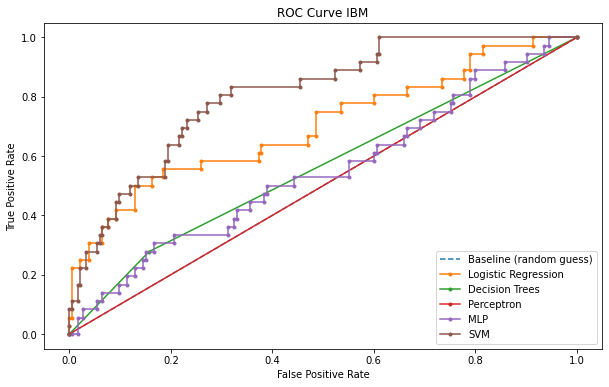


----------------------------------------------------------------------------------------------------
The AUC scores for the default models trained on Mushroom are as follows: 
----------------------------------------------------------------------------------------------------
Baseline (random guess): ROC AUC=0.5000
Logistic Regression: ROC AUC=0.9749
Decision Trees: ROC AUC=1.0000
Perceptron: ROC AUC=0.9722
MLP: ROC AUC=1.0000
SVM: ROC AUC=1.0000
----------------------------------------------------------------------------------------------------


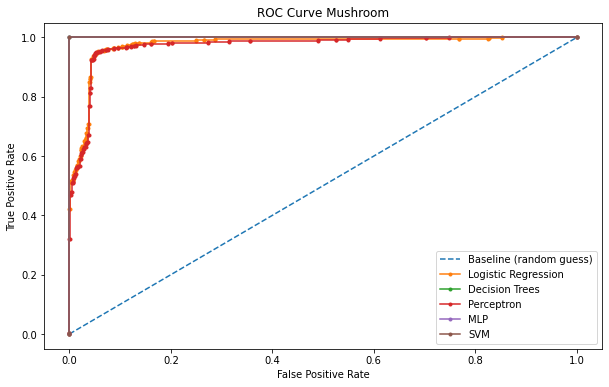

In [ ]:
# To hide all the warnings for a neat presentation
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once') # uncomment to display the warnings once adn not repeatedly and comment the line just above

# ROC for default models on IBM and Mushroom
rocplot(IbmX_test, Ibmy_test, IbmX_train, Ibmy_train, "IBM")
print()
rocplot(mushroomX_test, mushroomy_test, mushroomX_train, mushroomy_train, "Mushroom")



**Insights**: With default parameter values only Logistic Regression performed better with 0.70 AUC score (the model's capability of distinguishing classes) and all other algorithms are not any better than the baseline model(random prediction) having AUC score only around 0.5

## 3.2 Cross-Validation

------------------------------------------------------------------------------------------
	 	 	 	 	 ON IBM
------------------------------------------------------------------------------------------
Logistic Regression: Average Accuracy is 0.840838 and standard deviation is 0.005437
Decision Tree: Average Accuracy is 0.803838 and standard deviation is 0.028153
Perceptron: Average Accuracy is 0.838838 and standard deviation is 0.002985
MLP: Average Accuracy is 0.780838 and standard deviation is 0.124138
SVM: Average Accuracy is 0.877899 and standard deviation is 0.025916
------------------------------------------------------------------------------------------


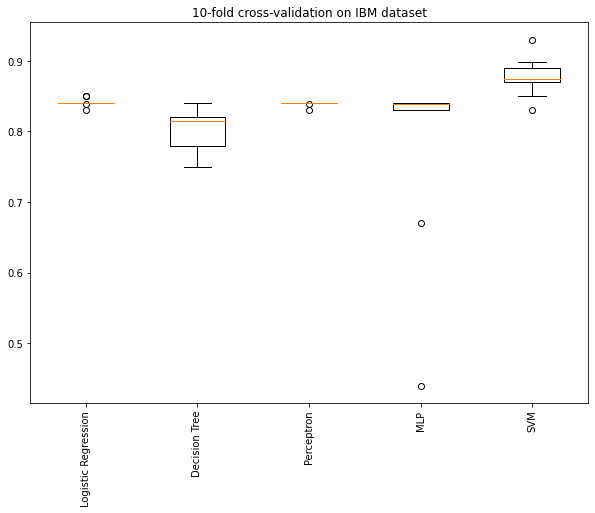


------------------------------------------------------------------------------------------
	 	 	 	 	 ON MUSHROOM
------------------------------------------------------------------------------------------
Logistic Regression: Average Accuracy is 0.948229 and standard deviation is 0.011351
Decision Tree: Average Accuracy is 1.000000 and standard deviation is 0.000000
Perceptron: Average Accuracy is 0.944247 and standard deviation is 0.009890
MLP: Average Accuracy is 1.000000 and standard deviation is 0.000000
SVM: Average Accuracy is 1.000000 and standard deviation is 0.000000
------------------------------------------------------------------------------------------


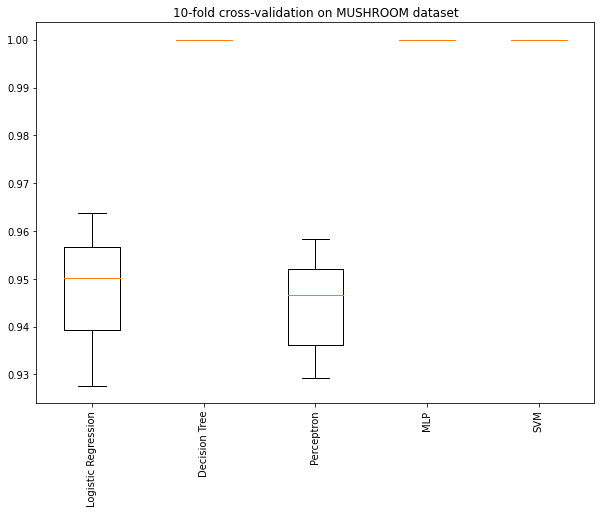

In [ ]:
# Evaluation of the default models using the performance metric Crossvalidation for IBM and mushroom

cv(IbmX_train, Ibmy_train, Ibmy_test, "IBM")
print()
cv(mushroomX_train, mushroomy_train, mushroomy_test, "MUSHROOM")

**Comments:** #To be included

## 3.3 Accuracy Score

In [ ]:
# Accuracy Score for all the default models on IBM and Mushroom dataset

accuracy(IbmX_train, Ibmy_train, IbmX_val, Ibmy_val, IbmX_test, Ibmy_test, 'IBM')
print ()
accuracy(mushroomX_train, mushroomy_train, mushroomX_val, mushroomy_val, mushroomX_test, mushroomy_test, 'MUSHROOM')

----------------------------------------------------------------------------------------------------
 	 	 	 	 Accuracy Score on IBM
----------------------------------------------------------------------------------------------------
Logistic Regression: on train set = 0.837838, on validation set = 0.840000, on test set = 0.841629
----------------------------------------------------------------------------------------------------
Decision Tree: on train set = 1.000000, on validation set = 0.796000, on test set = 0.742081
----------------------------------------------------------------------------------------------------
Perceptron: on train set = 0.838839, on validation set = 0.840000, on test set = 0.837104
----------------------------------------------------------------------------------------------------
MLP: on train set = 0.571572, on validation set = 0.548000, on test set = 0.538462
---------------------------------------------------------------------------------------------------

## 3.4 Confusion Matrix

In [ ]:
# Confusion Matrix for all the default models on IBM and Mushroom dataset
 
cm(IbmX_train, Ibmy_train, IbmX_val, Ibmy_val, IbmX_test, Ibmy_test, 'IBM')
print(100*'-')
cm(mushroomX_train, mushroomy_train, mushroomX_val, mushroomy_val, mushroomX_test, mushroomy_test, 'Mushroom')

------------------------------
  Confusion Matrix - IBM
------------------------------
Logistic Regression Model: 
 train set: 
 [[837   1]
 [161   0]] 
 validation set: 
 [[210   0]
 [ 40   0]] 
 test set: 
 [[185   0]
 [ 35   1]]
------------------------------
Decision Tree Model: 
 train set: 
 [[838   0]
 [  0 161]] 
 validation set: 
 [[181  29]
 [ 27  13]] 
 test set: 
 [[155  30]
 [ 26  10]]
------------------------------
Perceptron Model: 
 train set: 
 [[838   0]
 [161   0]] 
 validation set: 
 [[210   0]
 [ 40   0]] 
 test set: 
 [[185   0]
 [ 36   0]]
------------------------------
MLP Model: 
 train set: 
 [[838   0]
 [161   0]] 
 validation set: 
 [[210   0]
 [ 40   0]] 
 test set: 
 [[185   0]
 [ 36   0]]
------------------------------
SVM Model: 
 train set: 
 [[837   1]
 [ 65  96]] 
 validation set: 
 [[203   7]
 [ 31   9]] 
 test set: 
 [[181   4]
 [ 28   8]]
------------------------------
--------------------------------------------------------------------------------

## 3.5 Classification Report

In [ ]:
# Classification Report for all the default models on IBM and mushroom datasets

cr(IbmX_train, Ibmy_train, IbmX_val, Ibmy_val, IbmX_test, Ibmy_test, "IBM")
print(100*'-')
cr(mushroomX_train, mushroomy_train, mushroomX_val, mushroomy_val, mushroomX_test, mushroomy_test, "Mushroom")

----------------------------------------------------------------------
	 	    Classification Report - IBM
----------------------------------------------------------------------
	 	 	 Logistic Regression: 
 ON TRAIN SET: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       838
           1       0.00      0.00      0.00       161

    accuracy                           0.84       999
   macro avg       0.42      0.50      0.46       999
weighted avg       0.70      0.84      0.76       999
 
 ON VALIDATION SET: 
               precision    recall  f1-score   support

           0       0.84      1.00      0.91       210
           1       0.00      0.00      0.00        40

    accuracy                           0.84       250
   macro avg       0.42      0.50      0.46       250
weighted avg       0.71      0.84      0.77       250
 
 ON TEST SET: 
               precision    recall  f1-score   support

           0       0.84      

# **Parameter Optimization**

Tuning parameters is essential to build an optimum model that doesn't just perform well with data used for training but also has the ability to generalize well with the unseen data. Hence, in section 1 we divided the whole data into Train, Validation and Test. This enables us to not use the 
test data to tune the paraemeters but to use it only at the end to see how well we have trained a model. But the validation data can be used to tune the parameters and gives us an insight on how well the model can generalize on unseen data.


---

Tuning parameters is done in three main steps:

1a. Manual Tuning - This helps in understanding the parameters and the values it can take in an algorithm model. Also, helps in tweaking the parameters (finding the optimum value) using the model trained on train data and tested on validation set 

1b. Systematic approach - This is where one parameter is picked from the algorithm and optimizing it through a systematic approach. (Similar to finding the best ccp_alpha value for decision trees done in Lab 2).

2. Automated Tuning - This is done either through Grid Search or Randomized Search method where it finds the optimum parameter values efficiently.
In Grid Search,  all the possible combinations of parameter values are evaluated and the best combination is retained. Randomized search implements a randomized search over parameters, where each setting is sampled from a distribution over possible parameter values.(Reference:scikit-learn)





---




# **4. Parameter Optimization - Manual Tuning**

### 4.1 Logistic Regression 

In [ ]:
# Logistic model with default parameter values

LR_MT = LogisticRegression()

Ibm_LR_MT = LR_MT.fit(IbmX_train, Ibmy_train)
Mushroom_LR_MT = LR_MT.fit(mushroomX_train, mushroomy_train)

print(Ibm_LR_MT)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


**Insight:** The model hasn't converged as the default max_iter = 100 is reached. Tweaking this value to higher number could help in converging.

In [ ]:
# Parameter Optimization - Tuning Manually
# Step 1 - Optimizing the max_iter parameter 

# Tuning max_iter until the model covnerges on IBM and getting the accuracy
Ibm_LR_MT = LogisticRegression(max_iter = 4300)
Ibm_LR_MT.fit(IbmX_train, Ibmy_train)
print('Accuracy of on IBM train set: {:.5f}'.format(Ibm_LR_MT.score(IbmX_train, Ibmy_train)))
print('Accuracy of on IBM validation set: {:.5f}'.format(Ibm_LR_MT.score(IbmX_val, Ibmy_val)))
print(100*'-')

# Tuning max_iter until the model covnerges on Mushroom and getting the accuracy
Mushroom_LR_MT = LogisticRegression(max_iter = 428)
Mushroom_LR_MT.fit(mushroomX_train, mushroomy_train)
print('Accuracy of on Mushroom train set: {:.5f}'.format(Mushroom_LR_MT.score(mushroomX_train, mushroomy_train)))
print('Accuracy of on Mushroom validation set: {:.5f}'.format(Mushroom_LR_MT.score(mushroomX_val, mushroomy_val)))


Accuracy of on IBM train set: 0.90290
Accuracy of on IBM validation set: 0.86800
----------------------------------------------------------------------------------------------------
Accuracy of on Mushroom train set: 0.94823
Accuracy of on Mushroom validation set: 0.94352


**Comments:** On IBM data, the model converged when max_iter = 4300. Worked with different max_iter values (checking the accuracy simultaneously so the model doesn't overfit) until it convereged when max_iter = 4300

On Mushroom data, the model converged when max_iter = 428

---

**Further Steps:** To tune all different parameters using Train, Validation set and find the optimum value for the parameters and test the performance of the model on test data in the final step.

In [ ]:
# Step 2 - Tuning solver parameter

# Storing all the values the mentioned parameter can take
solver_opt = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

# Iterating the values of the parameter, fitting the model and getting the accuracy on IBM
print("On IBM")
for i in solver_opt:
  Ibm_LR_MT = LogisticRegression(max_iter = 4300, solver = i)
  Ibm_LR_MT.fit(IbmX_train, Ibmy_train)
  print("For solver ", str(i))
  print('Accuracy on train set: {:.5f}'.format(Ibm_LR_MT.score(IbmX_train, Ibmy_train)))
  print('Accuracy on validation set: {:.5f}'.format(Ibm_LR_MT.score(IbmX_val, Ibmy_val)))
  print(100*'-')
print(100*'-')
print(100*'-')

# Iterating the values of the parameter, fitting the model and getting the accuracy on Mushroom
print("On Mushroom")
for i in solver_opt:
  Mushroom_LR_MT = LogisticRegression(max_iter = 428, solver = i)
  Mushroom_LR_MT.fit(mushroomX_train, mushroomy_train)
  print("For solver ", str(i))
  print('Accuracy on train set: {:.5f}'.format(Mushroom_LR_MT.score(mushroomX_train, mushroomy_train)))
  print('Accuracy on validation set: {:.5f}'.format(Mushroom_LR_MT.score(mushroomX_val, mushroomy_val)))
  print(100*'-')

On IBM
For solver  newton-cg
Accuracy on train set: 0.89890
Accuracy on validation set: 0.87600
----------------------------------------------------------------------------------------------------
For solver  lbfgs
Accuracy on train set: 0.90290
Accuracy on validation set: 0.86800
----------------------------------------------------------------------------------------------------
For solver  liblinear
Accuracy on train set: 0.89089
Accuracy on validation set: 0.86000
----------------------------------------------------------------------------------------------------
For solver  sag
Accuracy on train set: 0.83884
Accuracy on validation set: 0.84000
----------------------------------------------------------------------------------------------------
For solver  saga
Accuracy on train set: 0.83884
Accuracy on validation set: 0.84000
----------------------------------------------------------------------------------------------------
----------------------------------------------------------

**Insight:** 

On IBM: Though the default solver - lbfgs performs better on train set, its ability to generalize on unseen data (validation set) is not as good as the solver 'newton-cg' which gives better accuracy on both train and validation sets and outperforms other solver values like 'saga', 'sag', 'liblinear'
And all other parameters were also checked for performace and they did not perform  any better than their default values. Hence they are left the same. 

On Mushroom: There is no change in performance on any data when tuning solver parameter, hence the deafult value is used

Further tuning of other parameters is done in the following steps (Automated and Systematic approach)

In [ ]:
# Storing the model with optimized parameter values (manual tuning) in relevant variables which can be put into the 'lr' variable(for fitting the model function) 
# Later this can be fitted through the function written for fitting all the models and thereby calling the functions for performance metrics

lr_ibm_mt = LogisticRegression(max_iter = 4300, solver = 'newton-cg')
lr_mushroom_mt = LogisticRegression(max_iter = 428)

### 4.2 Decision Trees

In [ ]:
# Decision Trees model with default parameter values fitted on IBM and Mushroom
DT_MT = DecisionTreeClassifier()
Ibm_DT_MT = DT_MT.fit(IbmX_train, Ibmy_train)
Mushroom_DT_MT = DT_MT.fit(mushroomX_train, mushroomy_train)

print(Ibm_DT_MT)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
# Step 1 - To find the performance of the model with different criterion values

# Storing all the values the mentioned parameter can take
criterion_opt = ['gini', 'entropy']

#Writing a function for iterating the values of the parameter, fitting the model and getting the accuracy
def dt_mt_1(model, X_train, y_train, X_val, y_val):
  for i in criterion_opt:
    model = DecisionTreeClassifier(criterion=i)
    model.fit(X_train, y_train)
    print("For Criterion: ", str(i))
    print('Accuracy of on train set: {:.5f}'.format(model.score(X_train, y_train)))
    print('Accuracy of on validation set: {:.5f}'.format(model.score(X_val, y_val)))
    print(100*'-')

# Calling the function for IBM
print("On IBM: ")
dt_mt_1(Ibm_DT_MT, IbmX_train, Ibmy_train, IbmX_val, Ibmy_val)
print(100*"-")
# Calling the function for Mushroom
print("On Mushroom")
dt_mt_1(Mushroom_DT_MT, mushroomX_train, mushroomy_train, mushroomX_val, mushroomy_val)


On IBM: 
For Criterion:  gini
Accuracy of on train set: 1.00000
Accuracy of on validation set: 0.79200
----------------------------------------------------------------------------------------------------
For Criterion:  entropy
Accuracy of on train set: 1.00000
Accuracy of on validation set: 0.76800
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
On Mushroom
For Criterion:  gini
Accuracy of on train set: 1.00000
Accuracy of on validation set: 1.00000
----------------------------------------------------------------------------------------------------
For Criterion:  entropy
Accuracy of on train set: 1.00000
Accuracy of on validation set: 1.00000
----------------------------------------------------------------------------------------------------


**Comments:** 

On IBM - We see that both the criterion values give 100% accuracy on the trained data, but the model seems to overfit as it performed badly predicting unseen data(validation data) with accuracy only around 75%

On Muhsroom - There is a 100 percent accuracy for both values

Comparing both the values the default criterion - 'gini' gives a 4% increase in accuracy than 'entropy'

In [ ]:
# Step 2 - Tuning the parameter 'splitter'

# Storing all the values the mentioned parameter can take
splitter_opt = ['best', 'random']

#Writing a function for iterating the values of the parameter, fitting the model and getting the accuracy
def dt_mt_2(model, X_train, y_train, X_val, y_val):
  for i in splitter_opt:
    model = DecisionTreeClassifier(splitter=i)
    model.fit(X_train, y_train)
    print("For Splitter: ", str(i))
    print('Accuracy of on train set: {:.5f}'.format(model.score(X_train, y_train)))
    print('Accuracy of on validation set: {:.5f}'.format(model.score(X_val, y_val)))
    print(100*'-')

# Calling the function for IBM
print("On IBM: ")
dt_mt_2(Ibm_DT_MT, IbmX_train, Ibmy_train, IbmX_val, Ibmy_val)
print(100*"-")
# Calling the function for Mushroom
print("On Mushroom")
dt_mt_2(Mushroom_DT_MT, mushroomX_train, mushroomy_train, mushroomX_val, mushroomy_val)

On IBM: 
For Splitter:  best
Accuracy of on train set: 1.00000
Accuracy of on validation set: 0.78400
----------------------------------------------------------------------------------------------------
For Splitter:  random
Accuracy of on train set: 1.00000
Accuracy of on validation set: 0.74800
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
On Mushroom
For Splitter:  best
Accuracy of on train set: 1.00000
Accuracy of on validation set: 1.00000
----------------------------------------------------------------------------------------------------
For Splitter:  random
Accuracy of on train set: 1.00000
Accuracy of on validation set: 1.00000
----------------------------------------------------------------------------------------------------


**Comments:** 
On IBM - The default value ('best') for splitter works better compared to the other value ('random') with accuracy on validation data as 79.2%

On Mushroom - Both the values give 100% accuracy


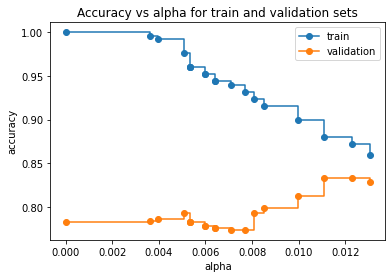

In [ ]:
# Step 3 - Tuning the parameter - ccp alpha (systematic Tuning) - on IBM

#dt = DecisionTreeClassifier(max_leaf_nodes = 200, max_depth = 6, ccp_alpha = 0.005)
clf = Ibm_DT_MT

path = clf.cost_complexity_pruning_path(IbmX_val, Ibmy_val)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(IbmX_val, Ibmy_val)
    clfs.append(clf)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
val_scores = [clf.score(IbmX_val, Ibmy_val) for clf in clfs]
train_scores = [clf.score(IbmX_train, Ibmy_train) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for train and validation sets")
ax.plot(ccp_alphas, val_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, train_scores, marker='o', label="validation",
        drawstyle="steps-post")
ax.legend()
plt.show()





**Comments:** The optimal value for ccp_alpha is where there is less difference in accuracy of the model on the train data and validation data. In the above plot, though the accuracy of the model on training data is 100% at the beginning (ccp_alpha = 0.0) the accuracy of the model on unseen data (validation set) is below 80%. But as the ccp_alpha value increases the we see a gradual decrease in accuracy on train set but gradual increase in accuracy on validation set. The opitmal point is when ccp_alpha 0.012 where there is less difference in the accuracy between train and validation.

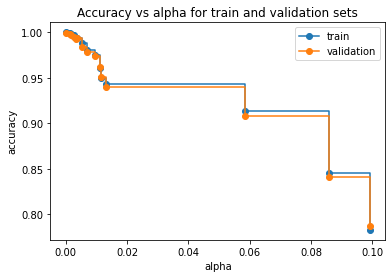

In [ ]:
# Step 3 - Tuning the parameter - ccp alpha (systematic Tuning) - on Mushroom


clf = Ibm_DT_MT

path = clf.cost_complexity_pruning_path(mushroomX_val, mushroomy_val)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(mushroomX_val, mushroomy_val)
    clfs.append(clf)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
val_scores = [clf.score(mushroomX_val, mushroomy_val) for clf in clfs]
train_scores = [clf.score(mushroomX_train, mushroomy_train) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for train and validation sets")
ax.plot(ccp_alphas, val_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, train_scores, marker='o', label="validation",
        drawstyle="steps-post")
ax.legend()
plt.show()

**Comments:** Its interesting to see that the accuracy of the model on both the train adn validation set gradually decrease together as the ccp_alpha value increases (unline in the IBM data). The default ccp_alpha (0.00) is the optimum value for this parameter

In [ ]:
# Step 3 - Tuning the parameter - ccp alpha - continued to get the accuracy scores in numbers

# Storing all the values the mentioned parameter can take
ccp_alpha = [x for x in np.linspace(0, 0.015, num=8)]

#Writing a function for iterating the values of the parameter, fitting the model and getting the accuracy
def dt_mt_3(model, X_train, y_train, X_val, y_val):
  for i in ccp_alpha:
    model = DecisionTreeClassifier(ccp_alpha=i)
    model.fit(X_train, y_train)
    print("For ccp alpha: ", str(i))
    print('Accuracy of on train set: {:.5f}'.format(model.score(X_train, y_train)))
    print('Accuracy of on validation set: {:.5f}'.format(model.score(X_val, y_val)))
    print(100*'-')

# Calling the function for IBM
print("On IBM: ")
dt_mt_3(Ibm_DT_MT, IbmX_train, Ibmy_train, IbmX_val, Ibmy_val)
print(100*"-")
# Calling the function for Mushroom
print("On Mushroom")
dt_mt_3(Mushroom_DT_MT, mushroomX_train, mushroomy_train, mushroomX_val, mushroomy_val)

On IBM: 
For ccp alpha:  0.0
Accuracy of on train set: 1.00000
Accuracy of on validation set: 0.78400
----------------------------------------------------------------------------------------------------
For ccp alpha:  0.002142857142857143
Accuracy of on train set: 0.92693
Accuracy of on validation set: 0.81200
----------------------------------------------------------------------------------------------------
For ccp alpha:  0.004285714285714286
Accuracy of on train set: 0.88188
Accuracy of on validation set: 0.80800
----------------------------------------------------------------------------------------------------
For ccp alpha:  0.006428571428571429
Accuracy of on train set: 0.87387
Accuracy of on validation set: 0.81600
----------------------------------------------------------------------------------------------------
For ccp alpha:  0.008571428571428572
Accuracy of on train set: 0.85586
Accuracy of on validation set: 0.80800
------------------------------------------------------

**Comments:** On IBM - the ccp alpha score around 0.01 works the best as it gives 84% accuracy score for train set, and 83% for validation set. Although, default ccp alpha score gives 100% accuracy for train set, but it gives only 78% accuracy score for validation set which indicates overfitting on train data

On Mushroom - the default ccp alpha (0.0) works the best as it gives 100% accuracy score for both train and validation set.

In [ ]:
# Storing the model with optimized parameter values (manual/systematic tuning) in relevant variables which can be put into the 'dt' variable(for fitting the model function) 
# Later this can be fitted through the function written for fitting all the models and thereby calling the functions for performance metrics

dt_ibm_mt = DecisionTreeClassifier(ccp_alpha=0.012)
dt_mushroom_mt = DecisionTreeClassifier()

### 4.3 Perceptron

In [ ]:
# Perceptron model with default parameter values fitted on IBM and Mushroom
SLP_MT = Perceptron()
Ibm_SLP_MT = SLP_MT.fit(IbmX_train, Ibmy_train)
Mushroom_SLP_MT = SLP_MT.fit(mushroomX_train, mushroomy_train)

print(Ibm_SLP_MT)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
# Step 1 - Tuning the parameter - alpha_opt

alpha_opt = [0.1, 0.01, 0.001, 1, 1.5, 2, 2.5, 3, 100]

#Writing a function for iterating the values of the parameter, fitting the model and getting the accuracy
def slp_mt_1(model, X_train, y_train, X_val, y_val):
  for i in alpha_opt:
    model = Perceptron(alpha=i)
    model = CalibratedClassifierCV(model)
    model.fit(X_train, y_train)
    print("For alpha: ", str(i))
    print('Accuracy of on train set: {:.5f}'.format(model.score(X_train, y_train)))
    print('Accuracy of on validation set: {:.5f}'.format(model.score(X_val, y_val)))
    print(100*'-')

# Calling the function for IBM
print("On IBM: ")
slp_mt_1(Ibm_SLP_MT, IbmX_train, Ibmy_train, IbmX_val, Ibmy_val)
print(100*"-")
# Calling the function for Mushroom
print("On Mushroom")
slp_mt_1(Mushroom_SLP_MT, mushroomX_train, mushroomy_train, mushroomX_val, mushroomy_val)

On IBM: 
For alpha:  0.1
Accuracy of on train set: 0.83884
Accuracy of on validation set: 0.84000
----------------------------------------------------------------------------------------------------
For alpha:  0.01
Accuracy of on train set: 0.83884
Accuracy of on validation set: 0.84000
----------------------------------------------------------------------------------------------------
For alpha:  0.001
Accuracy of on train set: 0.83884
Accuracy of on validation set: 0.84000
----------------------------------------------------------------------------------------------------
For alpha:  1
Accuracy of on train set: 0.83884
Accuracy of on validation set: 0.84000
----------------------------------------------------------------------------------------------------
For alpha:  1.5
Accuracy of on train set: 0.83884
Accuracy of on validation set: 0.84000
----------------------------------------------------------------------------------------------------
For alpha:  2
Accuracy of on train set: 

**Comments:** No matter how the parameter (alpha) is tuned there is no change in the performance of the model on any data. This must be investigated further to understand why.  

### 4.4 Multi-Layer Perceptron

In [ ]:
# MLP model with default parameter values fitted on IBM and Mushroom
MLP_MT = MLPClassifier()
Ibm_MLP_MT = MLP_MT.fit(IbmX_train, Ibmy_train)
Mushroom_MLP_MT = MLP_MT.fit(mushroomX_train, mushroomy_train)

#To look into the parameters MLP can take
print(Ibm_MLP_MT)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


**Comments:** the MLP models are converged with the default max_iter values on both the datasets

In [ ]:
# Step 1 - To find the performance of the model with different activation values

# Storing all the values the mentioned parameter can take
activation_opt = ['identity', 'logistic', 'tanh', 'relu']

#Writing a function for iterating the values of the parameter, fitting the model and getting the accuracy
def mlp_mt_1(model, X_train, y_train, X_val, y_val):
  for i in activation_opt:
    model = MLPClassifier(activation=i)
    model.fit(X_train, y_train)
    print("For activation: ", str(i))
    print('Accuracy of on train set: {:.5f}'.format(model.score(X_train, y_train)))
    print('Accuracy of on validation set: {:.5f}'.format(model.score(X_val, y_val)))
    print(100*'-')

# Calling the function for IBM
print("On IBM: ")
mlp_mt_1(Ibm_MLP_MT, IbmX_train, Ibmy_train, IbmX_val, Ibmy_val)
print(100*"-")
# Calling the function for Mushroom
print("On Mushroom")
mlp_mt_1(Mushroom_MLP_MT, mushroomX_train, mushroomy_train, mushroomX_val, mushroomy_val)


On IBM: 
For activation:  identity
Accuracy of on train set: 0.21021
Accuracy of on validation set: 0.19600
----------------------------------------------------------------------------------------------------
For activation:  logistic
Accuracy of on train set: 0.83884
Accuracy of on validation set: 0.84000
----------------------------------------------------------------------------------------------------
For activation:  tanh
Accuracy of on train set: 0.83884
Accuracy of on validation set: 0.84000
----------------------------------------------------------------------------------------------------
For activation:  relu
Accuracy of on train set: 0.84084
Accuracy of on validation set: 0.83600
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
On Mushroom
For activation:  identity
Accuracy of on train set: 0.94895
Accuracy of on validation 

**Comments:** 

On IBM: the model works well for logistic and reluc activation functions and we stick to the default value that is relu

On Mushroom: With the activation 'identity' the model performes poorly on both the datasets. Also, on mushroom data the accuracy decreased from 100% to 94% when compared to the other values of the activation function

In [ ]:
# Step 2 - Tuning the parameter 'learning_rate'

# Storing all the values the mentioned parameter can take
learning_rate_opt = ['constant', 'invscaling', 'adaptive']

#Writing a function for iterating the values of the parameter, fitting the model and getting the accuracy
def mlp_mt_2(model, X_train, y_train, X_val, y_val):
  for i in learning_rate_opt:
    model = MLPClassifier(learning_rate=i)
    model.fit(X_train, y_train)
    print("For learning_rate: ", str(i))
    print('Accuracy of on train set: {:.5f}'.format(model.score(X_train, y_train)))
    print('Accuracy of on validation set: {:.5f}'.format(model.score(X_val, y_val)))
    print(100*'-')

# Calling the function for IBM
print("On IBM: ")
mlp_mt_2(Ibm_MLP_MT, IbmX_train, Ibmy_train, IbmX_val, Ibmy_val)
print(100*"-")
# Calling the function for Mushroom
print("On Mushroom")
mlp_mt_2(Mushroom_MLP_MT, mushroomX_train, mushroomy_train, mushroomX_val, mushroomy_val)

On IBM: 
For learning_rate:  constant
Accuracy of on train set: 0.83483
Accuracy of on validation set: 0.83600
----------------------------------------------------------------------------------------------------
For learning_rate:  invscaling
Accuracy of on train set: 0.82983
Accuracy of on validation set: 0.83600
----------------------------------------------------------------------------------------------------
For learning_rate:  adaptive
Accuracy of on train set: 0.83884
Accuracy of on validation set: 0.84000
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
On Mushroom
For learning_rate:  constant
Accuracy of on train set: 1.00000
Accuracy of on validation set: 1.00000
----------------------------------------------------------------------------------------------------
For learning_rate:  invscaling
Accuracy of on train set: 1.00000

**Comments:** Model with the default value 'constant' for learning_rate performs better on both datasets

## 4.5 Support-Vector Machines

In [ ]:
# SVM model with default parameter values fitted on IBM and Mushroom

SVM_MT = make_pipeline(StandardScaler(), SVC())
Ibm_SVM_MT = SVM_MT.fit(IbmX_train, Ibmy_train)
Mushroom_SVM_MT = SVM_MT.fit(mushroomX_train, mushroomy_train)

#To look into the parameters
print(Ibm_SVM_MT)


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)


In [ ]:
# Step 1 - To find the performance of the model with different kernel values

# Storing all the values the mentioned parameter can take - the value 'precomputed' works only on square matrix so it is not used to train models
kernel_opt = ['linear', 'poly', 'rbf', 'sigmoid']

#Writing a function for iterating the values of the parameter, fitting the model and getting the accuracy
def svm_mt_1(model, X_train, y_train, X_val, y_val):
  for i in kernel_opt:
    model =  make_pipeline(StandardScaler(), SVC(kernel=i))
    model.fit(X_train, y_train)
    print("For kernel: ", str(i))
    print('Accuracy of on train set: {:.5f}'.format(model.score(X_train, y_train)))
    print('Accuracy of on validation set: {:.5f}'.format(model.score(X_val, y_val)))
    print(100*'-')

# Calling the function for IBM
print("On IBM: ")
svm_mt_1(Ibm_SVM_MT, IbmX_train, Ibmy_train, IbmX_val, Ibmy_val)
print(100*"-")
# Calling the function for Mushroom
print("On Mushroom")
svm_mt_1(Mushroom_SVM_MT, mushroomX_train, mushroomy_train, mushroomX_val, mushroomy_val)


On IBM: 
For kernel:  linear
Accuracy of on train set: 0.90190
Accuracy of on validation set: 0.86000
----------------------------------------------------------------------------------------------------
For kernel:  poly
Accuracy of on train set: 0.93594
Accuracy of on validation set: 0.84400
----------------------------------------------------------------------------------------------------
For kernel:  rbf
Accuracy of on train set: 0.92292
Accuracy of on validation set: 0.85600
----------------------------------------------------------------------------------------------------
For kernel:  sigmoid
Accuracy of on train set: 0.86386
Accuracy of on validation set: 0.86400
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
On Mushroom
For kernel:  linear
Accuracy of on train set: 0.95022
Accuracy of on validation set: 0.94352
-------------

**Comments:** 

On IBM: Models with kernel values poly and rbf performs best on train set but 'linear' and 'sigmoid' values beat them in terms of generalization (performs well both on train and unseen validation data). The default value for kernel parameter is retained since the performance on unseen data is only 0.4% lesser than (kernel='linear').

On Mushroom: The model performs the opposite on mushroom data as compared to IBM. The default value is retained.

In [ ]:
# Step 2 - Tuning the parameter 'gamma'

# Storing all the values the mentioned parameter can take
gamma_opt = ['scale', 'auto']

#Writing a function for iterating the values of the parameter, fitting the model and getting the accuracy
def svm_mt_2(model, X_train, y_train, X_val, y_val):
  for i in gamma_opt:
    model = make_pipeline(StandardScaler(), SVC(gamma=i))
    model.fit(X_train, y_train)
    print("For gamma: ", str(i))
    print('Accuracy of on train set: {:.5f}'.format(model.score(X_train, y_train)))
    print('Accuracy of on validation set: {:.5f}'.format(model.score(X_val, y_val)))
    print(100*'-')

# Calling the function for IBM
print("On IBM: ")
svm_mt_2(Ibm_SVM_MT, IbmX_train, Ibmy_train, IbmX_val, Ibmy_val)
print(100*"-")
# Calling the function for Mushroom
print("On Mushroom")
svm_mt_2(Mushroom_SVM_MT, mushroomX_train, mushroomy_train, mushroomX_val, mushroomy_val)

On IBM: 
For gamma:  scale
Accuracy of on train set: 0.92292
Accuracy of on validation set: 0.85600
----------------------------------------------------------------------------------------------------
For gamma:  auto
Accuracy of on train set: 0.92292
Accuracy of on validation set: 0.85600
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
On Mushroom
For gamma:  scale
Accuracy of on train set: 1.00000
Accuracy of on validation set: 1.00000
----------------------------------------------------------------------------------------------------
For gamma:  auto
Accuracy of on train set: 1.00000
Accuracy of on validation set: 1.00000
----------------------------------------------------------------------------------------------------


**Comments:** There are no change in performance on both IBM and Mushroom. The default value is retained

# **5. Evaluation and Comparison of the (Manual/Systematic Tuning) optimized models**

## 5.1 ROC Curve

----------------------------------------------------------------------------------------------------
The AUC scores for the default models trained on IBM are as follows: 
----------------------------------------------------------------------------------------------------
Baseline (random guess): ROC AUC=0.5000
Logistic Regression: ROC AUC=0.8152
Decision Trees: ROC AUC=0.6485
Perceptron: ROC AUC=0.5000
MLP: ROC AUC=0.6312
SVM: ROC AUC=0.8086
----------------------------------------------------------------------------------------------------


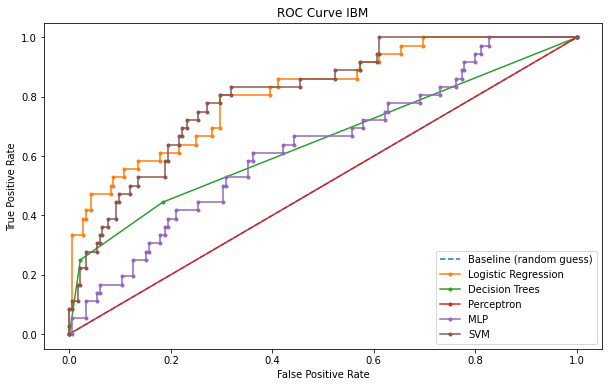



----------------------------------------------------------------------------------------------------
The AUC scores for the default models trained on Mushroom are as follows: 
----------------------------------------------------------------------------------------------------
Baseline (random guess): ROC AUC=0.5000
Logistic Regression: ROC AUC=0.9751
Decision Trees: ROC AUC=1.0000
Perceptron: ROC AUC=0.9722
MLP: ROC AUC=1.0000
SVM: ROC AUC=1.0000
----------------------------------------------------------------------------------------------------


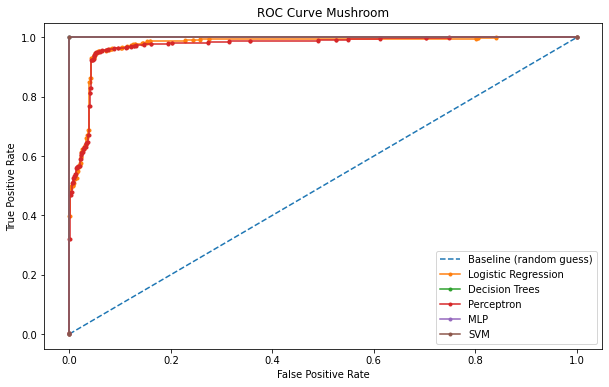

In [ ]:
# ROC for manually optimized models on IBM and Mushroom
# Storing the optimized models from previous steps to its relevant variables where it get called in functions
# Only Logistic Regression and Decision Trees was optimized with values other than the default values of a parameter. Other models still perform well with the default values

lr = lr_ibm_mt
dt = dt_ibm_mt
rocplot(IbmX_test, Ibmy_test, IbmX_train, Ibmy_train, "IBM")
print("\n")
lr = lr_mushroom_mt
dt = dt_mushroom_mt
rocplot(mushroomX_test, mushroomy_test, mushroomX_train, mushroomy_train, "Mushroom")

**Comments:** After manually optimizing the parameters for Logistic model the AUC score for the model on IBM improved from 0.702 to 0.815. However there is no improvement in the AUC score for the model on Mushroom dataset

## 5.2 Cross-validation

------------------------------------------------------------------------------------------
	 	 	 	 	 ON IBM
------------------------------------------------------------------------------------------
Logistic Regression: Average Accuracy is 0.879909 and standard deviation is 0.033980
Decision Tree: Average Accuracy is 0.828808 and standard deviation is 0.029944
Perceptron: Average Accuracy is 0.838838 and standard deviation is 0.002985
MLP: Average Accuracy is 0.791838 and standard deviation is 0.137334
SVM: Average Accuracy is 0.877899 and standard deviation is 0.025916
------------------------------------------------------------------------------------------


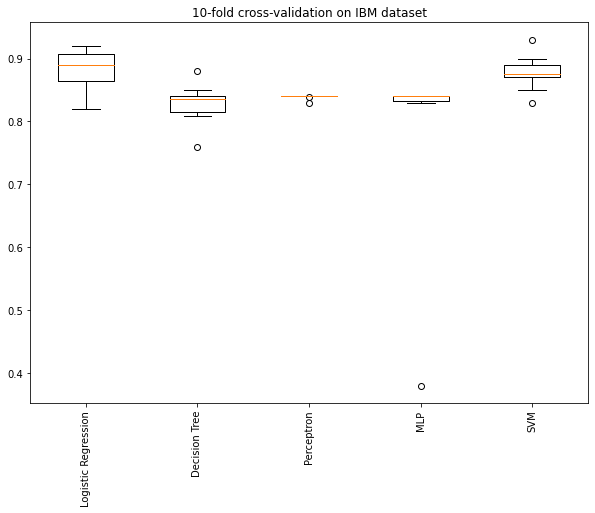


------------------------------------------------------------------------------------------
	 	 	 	 	 ON MUSHROOM
------------------------------------------------------------------------------------------
Logistic Regression: Average Accuracy is 0.947143 and standard deviation is 0.011708
Decision Tree: Average Accuracy is 1.000000 and standard deviation is 0.000000
Perceptron: Average Accuracy is 0.944247 and standard deviation is 0.009890
MLP: Average Accuracy is 1.000000 and standard deviation is 0.000000
SVM: Average Accuracy is 1.000000 and standard deviation is 0.000000
------------------------------------------------------------------------------------------


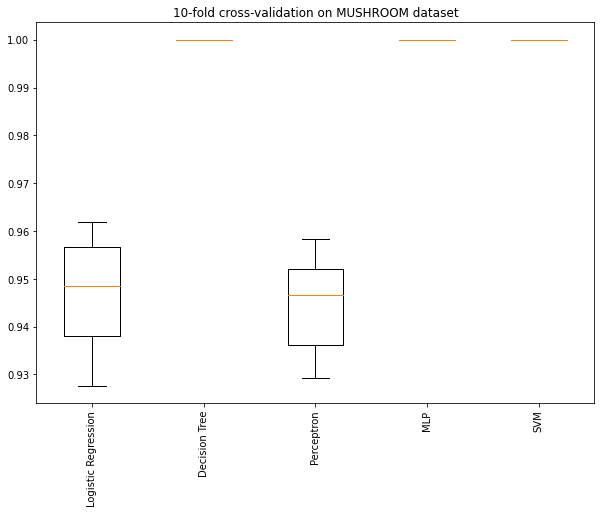

In [ ]:
# Evaluation of the optimized models from the previous section using the performance metric Crossvalidation for IBM and mushroom

lr = lr_ibm_mt
dt = dt_ibm_mt
cv(IbmX_train, Ibmy_train, Ibmy_test, "IBM")
print()
lr = lr_mushroom_mt
dt = dt_mushroom_mt
cv(mushroomX_train, mushroomy_train, mushroomy_test, "MUSHROOM")

**Comments:** 
After manually optimizing the paramters, the Logistic model improved its accuracy from 85% to 88% on IBM data



## 5.3 Accuracy Score

In [ ]:
# Accuracy Score for the optimized models on IBM and Mushroom dataset

lr = lr_ibm_mt
dt = dt_ibm_mt
accuracy(IbmX_train, Ibmy_train, IbmX_val, Ibmy_val, IbmX_test, Ibmy_test, 'IBM')
print ()
lr = lr_mushroom_mt
dt = dt_mushroom_mt
accuracy(mushroomX_train, mushroomy_train, mushroomX_val, mushroomy_val, mushroomX_test, mushroomy_test, 'MUSHROOM')

----------------------------------------------------------------------------------------------------
 	 	 	 	 Accuracy Score on IBM
----------------------------------------------------------------------------------------------------
Logistic Regression: on train set = 0.898899, on validation set = 0.876000, on test set = 0.886878
----------------------------------------------------------------------------------------------------
Decision Tree: on train set = 0.843844, on validation set = 0.832000, on test set = 0.859729
----------------------------------------------------------------------------------------------------
Perceptron: on train set = 0.838839, on validation set = 0.840000, on test set = 0.837104
----------------------------------------------------------------------------------------------------
MLP: on train set = 0.298298, on validation set = 0.256000, on test set = 0.262443
---------------------------------------------------------------------------------------------------

## 5.4 Confusion Matrix

In [ ]:
# Confusion Matrix for the so far optimized models on IBM and Mushroom dataset

lr = lr_ibm_mt
dt = dt_ibm_mt 
cm(IbmX_train, Ibmy_train, IbmX_val, Ibmy_val, IbmX_test, Ibmy_test, 'IBM')
print ()
lr = lr_mushroom_mt
dt = dt_mushroom_mt
cm(mushroomX_train, mushroomy_train, mushroomX_val, mushroomy_val, mushroomX_test, mushroomy_test, 'Mushroom')

------------------------------
  Confusion Matrix - IBM
------------------------------
Logistic Regression Model: 
 train set: 
 [[813  25]
 [ 76  85]] 
 validation set: 
 [[204   6]
 [ 25  15]] 
 test set: 
 [[184   1]
 [ 24  12]]
------------------------------
Decision Tree Model: 
 train set: 
 [[784  54]
 [102  59]] 
 validation set: 
 [[194  16]
 [ 26  14]] 
 test set: 
 [[181   4]
 [ 27   9]]
------------------------------
Perceptron Model: 
 train set: 
 [[838   0]
 [161   0]] 
 validation set: 
 [[210   0]
 [ 40   0]] 
 test set: 
 [[185   0]
 [ 36   0]]
------------------------------
MLP Model: 
 train set: 
 [[206 632]
 [ 16 145]] 
 validation set: 
 [[ 42 168]
 [  3  37]] 
 test set: 
 [[ 33 152]
 [  5  31]]
------------------------------
SVM Model: 
 train set: 
 [[837   1]
 [ 65  96]] 
 validation set: 
 [[203   7]
 [ 31   9]] 
 test set: 
 [[181   4]
 [ 28   8]]
------------------------------

------------------------------
  Confusion Matrix - Mushroom
------------------

## 5.5 Classification Report

In [ ]:
# Classification Report for the optimized models on IBM and mushroom datasets

lr = lr_ibm_mt
dt = dt_ibm_mt
cr(IbmX_train, Ibmy_train, IbmX_val, Ibmy_val, IbmX_test, Ibmy_test, "IBM")
print()
print ()
lr = lr_mushroom_mt
dt = dt_mushroom_mt
cr(mushroomX_train, mushroomy_train, mushroomX_val, mushroomy_val, mushroomX_test, mushroomy_test, "Mushroom")

----------------------------------------------------------------------
	 	    Classification Report - IBM
----------------------------------------------------------------------
	 	 	 Logistic Regression: 
 ON TRAIN SET: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       838
           1       0.77      0.53      0.63       161

    accuracy                           0.90       999
   macro avg       0.84      0.75      0.78       999
weighted avg       0.89      0.90      0.89       999
 
 ON VALIDATION SET: 
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       210
           1       0.71      0.38      0.49        40

    accuracy                           0.88       250
   macro avg       0.80      0.67      0.71       250
weighted avg       0.86      0.88      0.86       250
 
 ON TEST SET: 
               precision    recall  f1-score   support

           0       0.88      

# **6. Parameter Optimization - Automated Tuning**

## 6.1 Logistic Regression

In [ ]:
# Reference - https://www.kaggle.com/enespolat/grid-search-with-logistic-regression
#"C":np.logspace(-3,3,7)
# Parameter Tuning using Grid Search on IBM and Mushroom
grid={"multi_class":['auto', 'ovr', 'multinomial'], "fit_intercept":[True,False]}
lr_ibm = lr_ibm_mt
gridsearch(lr_ibm, IbmX_train, Ibmy_train, "IBM")
lr_mushroom = lr_mushroom_mt
gridsearch(lr_mushroom, mushroomX_train, mushroomy_train, "Mushroom")



----------------------------------------------------------------------------------------------------
On IBM
----------------------------------------------------------------------------------------------------
Best Parameters with Grid Search:  {'fit_intercept': False, 'multi_class': 'multinomial'}
Accuracy after Cross-Validation:  0.8808994974874371
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
On Mushroom
----------------------------------------------------------------------------------------------------
Best Parameters with Grid Search:  {'fit_intercept': False, 'multi_class': 'auto'}
Accuracy after Cross-Validation:  0.9476844383238244
----------------------------------------------------------------------------------------------------



In [ ]:
# Parameter Tuning using Randomized Search

#rs(lr, IbmX_train, Ibmy_train, "IBM")
#rs(lr, mushroomX_train, mushroomy_train, "Mushroom")



## 6.2 Decision Trees

In [ ]:
# Parameter Tuning using Randomized Search

ccp_alpha = [x for x in np.linspace(0, 0.035, num=8)]
max_depth = [2, 4, 6, 8, 10, 12, 14, 16, None]
max_leaf_nodes = [100, 200, 300, 400, None]

grid = {'ccp_alpha': ccp_alpha,
        'max_depth': max_depth,
        'max_leaf_nodes': max_leaf_nodes,
        }

randomsearch(dt, IbmX_train, Ibmy_train, "IBM")
randomsearch(dt, mushroomX_train, mushroomy_train, "Mushroom")

----------------------------------------------------------------------------------------------------
On IBM
----------------------------------------------------------------------------------------------------
Best Parameters with Random Search:  {'max_leaf_nodes': 100, 'max_depth': 12, 'ccp_alpha': 0.025}
Accuracy:  0.8388391959798994
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
On Mushroom
----------------------------------------------------------------------------------------------------
Best Parameters with Random Search:  {'max_leaf_nodes': 200, 'max_depth': 8, 'ccp_alpha': 0.0}
Accuracy:  1.0
----------------------------------------------------------------------------------------------------



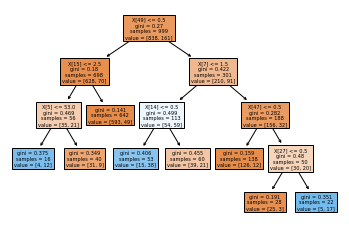

In [ ]:
# Visualise the tree - on IBM

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(max_leaf_nodes = 200, max_depth = 6, ccp_alpha = 0.005)
ibmdt = dt.fit(IbmX_train, Ibmy_train)
plot_tree(ibmdt, filled=True)
plt.show()

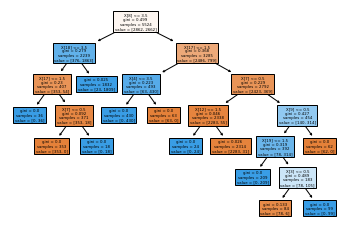

In [ ]:
# Visualise the tree - on Mushroom

dt = DecisionTreeClassifier(max_leaf_nodes = 200, max_depth = 6, ccp_alpha = 0.005)
mushroomdt = dt.fit(mushroomX_train, mushroomy_train)
plot_tree(mushroomdt, filled=True)
plt.show()


## 6.3 Perceptron

In [ ]:
# Parameter Tuning using Randomized Search

grid = {'alpha':[0.0001,0.001,0.01,0.1,1,10],
                   'eta0':[0.0001,0.001,0.01,0.1,1,10],
                   'max_iter': range(50,200,50)
                    }
slp = Perceptron()
randomsearch(slp, IbmX_train, Ibmy_train, "IBM")
randomsearch(slp, mushroomX_train, mushroomy_train, "Mushroom")

----------------------------------------------------------------------------------------------------
On IBM
----------------------------------------------------------------------------------------------------
Best Parameters with Random Search:  {'max_iter': 150, 'eta0': 0.01, 'alpha': 1}
Accuracy:  0.8388391959798994
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
On Mushroom
----------------------------------------------------------------------------------------------------
Best Parameters with Random Search:  {'max_iter': 100, 'eta0': 0.01, 'alpha': 0.1}
Accuracy:  0.9301227949373729
----------------------------------------------------------------------------------------------------



## 6.4 Multi-Layer Perceptron

In [ ]:
# Parameter Tuning using Randomized Search - Takes a long time to run

grid = {'hidden_layer_sizes': range(1,200,10), 
                  'activation': ['tanh','logistic','relu'],
                  'alpha':[0.0001,0.001,0.01,0.1,1,10], 
                  'max_iter': range(50,200,50)
                  }
mlp = MLPClassifier()
randomsearch(mlp, IbmX_train, Ibmy_train, "IBM")
randomsearch(mlp, mushroomX_train, mushroomy_train, "Mushroom")

----------------------------------------------------------------------------------------------------
On IBM
----------------------------------------------------------------------------------------------------
Best Parameters with Random Search:  {'max_iter': 150, 'hidden_layer_sizes': 81, 'alpha': 0.01, 'activation': 'tanh'}
Accuracy:  0.8388391959798994
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
On Mushroom
----------------------------------------------------------------------------------------------------
Best Parameters with Random Search:  {'max_iter': 100, 'hidden_layer_sizes': 131, 'alpha': 0.1, 'activation': 'relu'}
Accuracy:  1.0
----------------------------------------------------------------------------------------------------



## 6.5 Support-Vector Machines

In [ ]:
# Parameter Tuning using Grid Search
# Reference: https://www.kaggle.com/udaysa/svm-with-scikit-learn-svm-with-parameter-tuning
# The python function written (sec 2.7) is not called because the SVC model goes through a pipeline where the parameters are not recognized
# Hence the model is fit directly into GridSearchCV()

grid = {'C': [0.001, 0.10, 0.1, 0.5], 
         'gamma': [1e-2, 1e-3, 1e-4, 1e-5]}
         
model = GridSearchCV(SVC(), grid, cv=5)
model = model.fit(IbmX_train, Ibmy_train)
print(100*'-')
print("On IBM" )
print(100*'-')
print("Best Parameters with Random Search: ", model.best_params_)
print("Accuracy after Cross-Validation: ", model.best_score_)
print(100*'-')
print()

model = GridSearchCV(SVC(), grid, cv=5)
model = model.fit(mushroomX_train, mushroomy_train)
print(100*'-')
print("On Mushroom" )
print(100*'-')
print("Best Parameters with Random Search: ", model.best_params_)
print("Accuracy after Cross-Validation: ", model.best_score_)
print(100*'-')
print()
        

----------------------------------------------------------------------------------------------------
On IBM
----------------------------------------------------------------------------------------------------
Best Parameters with Random Search:  {'C': 0.001, 'gamma': 0.01}
Accuracy after Cross-Validation:  0.8388391959798994
----------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------
On Mushroom
----------------------------------------------------------------------------------------------------
Best Parameters with Random Search:  {'C': 0.5, 'gamma': 0.01}
Accuracy after Cross-Validation:  0.9818970096399763
----------------------------------------------------------------------------------------------------



**Comments:** The best parameter values searched through Randomized Search method did not improve the model's performance

# **7. Evaluation and Comparison of the optimized models**

## 7.1 ROC Curve

----------------------------------------------------------------------------------------------------
The AUC scores for the default models trained on IBM are as follows: 
----------------------------------------------------------------------------------------------------
Baseline (random guess): ROC AUC=0.5000
Logistic Regression: ROC AUC=0.7623
Decision Trees: ROC AUC=0.5052
Perceptron: ROC AUC=0.5000
MLP: ROC AUC=0.5389
SVM: ROC AUC=0.8086
----------------------------------------------------------------------------------------------------


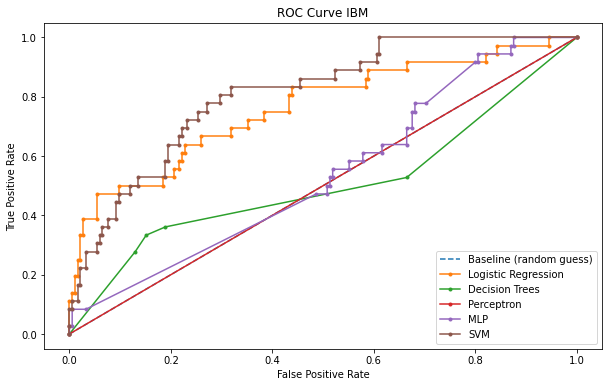


----------------------------------------------------------------------------------------------------
The AUC scores for the default models trained on Mushroom are as follows: 
----------------------------------------------------------------------------------------------------
Baseline (random guess): ROC AUC=0.5000
Logistic Regression: ROC AUC=0.9745
Decision Trees: ROC AUC=1.0000
Perceptron: ROC AUC=0.9702
MLP: ROC AUC=1.0000
SVM: ROC AUC=1.0000
----------------------------------------------------------------------------------------------------


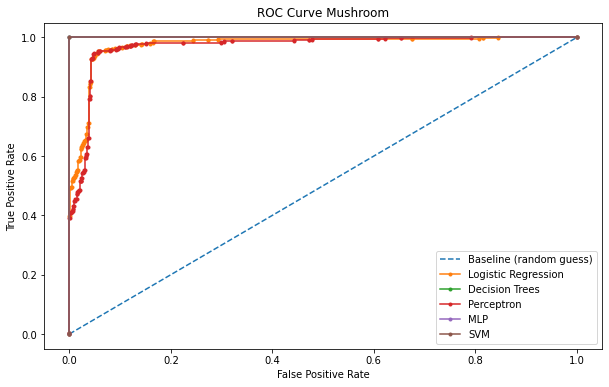

In [ ]:
# Plotting ROC on IBM and Mushroom

# Calling models for the optimum parameter values on IBM Dataset and storing the models to the variables in the function

data = ''

if data == "IBM":
  lr = LogisticRegression(max_iter = 4300, solver = 'newton-cg', fit_intercept = False, multi_class = 'auto')
  dt = DecisionTreeClassifier(max_leaf_nodes = 200, max_depth = 6, ccp_alpha = 0.012)
  slp = Perceptron(max_iter = 100, eta0 = 0.0001, alpha = 0.001)
  mlp = MLPClassifier(max_iter = 100, hidden_layer_sizes = 151, alpha = 0.001, activation = 'tanh')
  svm = make_pipeline(StandardScaler(), SVC())
else:
  lr = LogisticRegression(max_iter = 428, fit_intercept = False, multi_class = 'auto')
  dt = DecisionTreeClassifier(max_leaf_nodes = 100, max_depth = 16, ccp_alpha = 0.0)
  slp = Perceptron(max_iter = 100, eta0 = 0.01, alpha = 0.0001)
  mlp = MLPClassifier(max_iter = 100, hidden_layer_sizes = 191, alpha = 0.001, activation = 'tanh')
  svm = make_pipeline(StandardScaler(), SVC())


data = "IBM"
rocplot(IbmX_test, Ibmy_test, IbmX_train, Ibmy_train, "IBM")
print()
data = "Mushroom"
rocplot(mushroomX_test, mushroomy_test, mushroomX_train, mushroomy_train, "Mushroom")


## 7.2 Cross-Validation

------------------------------------------------------------------------------------------
	 	 	 	 	 ON IBM
------------------------------------------------------------------------------------------
Logistic Regression: Average Accuracy is 0.856899 and standard deviation is 0.021735
Decision Tree: Average Accuracy is 0.805798 and standard deviation is 0.024224
Perceptron: Average Accuracy is 0.838838 and standard deviation is 0.002985
MLP: Average Accuracy is 0.838838 and standard deviation is 0.002985
SVM: Average Accuracy is 0.877899 and standard deviation is 0.025916
------------------------------------------------------------------------------------------


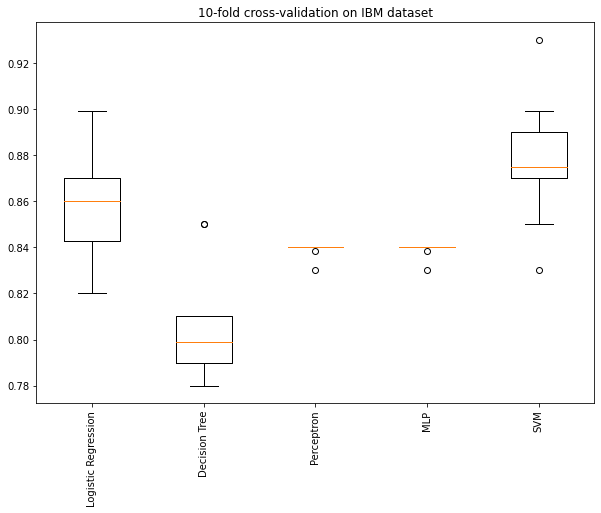


------------------------------------------------------------------------------------------
	 	 	 	 	 ON MUSHROOM
------------------------------------------------------------------------------------------
Logistic Regression: Average Accuracy is 0.947325 and standard deviation is 0.011471
Decision Tree: Average Accuracy is 1.000000 and standard deviation is 0.000000
Perceptron: Average Accuracy is 0.946781 and standard deviation is 0.011411
MLP: Average Accuracy is 1.000000 and standard deviation is 0.000000
SVM: Average Accuracy is 1.000000 and standard deviation is 0.000000
------------------------------------------------------------------------------------------


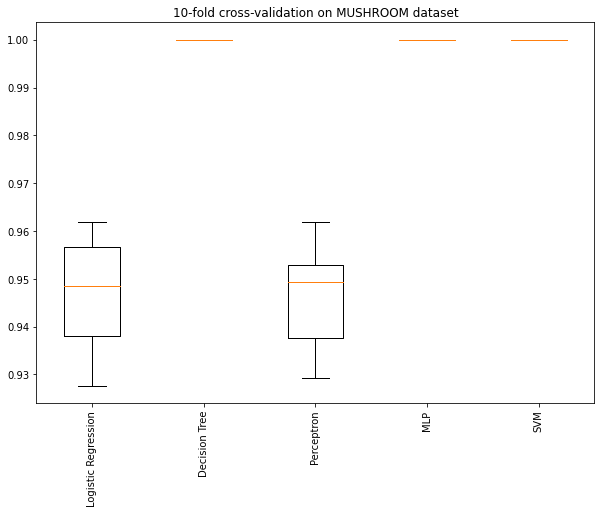

In [ ]:
# Evaluation of the optimized models from the previous section using the performance metric Crossvalidation for IBM and mushroom

data = "IBM"
cv(IbmX_train, Ibmy_train, Ibmy_test, "IBM")
print()
data = "Mushroom"
cv(mushroomX_train, mushroomy_train, mushroomy_test, "MUSHROOM")

## 7.3 Accuracy Score

In [ ]:
# Accuracy Score for optimized models on IBM and Mushroom dataset

data = "IBM"
accuracy(IbmX_train, Ibmy_train, IbmX_val, Ibmy_val, IbmX_test, Ibmy_test, 'IBM')
print ()
data = "Mushroom"
accuracy(mushroomX_train, mushroomy_train, mushroomX_val, mushroomy_val, mushroomX_test, mushroomy_test, 'MUSHROOM')

----------------------------------------------------------------------------------------------------
 	 	 	 	 Accuracy Score on IBM
----------------------------------------------------------------------------------------------------
Logistic Regression: on train set = 0.863864, on validation set = 0.848000, on test set = 0.864253
----------------------------------------------------------------------------------------------------
Decision Tree: on train set = 0.986987, on validation set = 0.792000, on test set = 0.755656
----------------------------------------------------------------------------------------------------
Perceptron: on train set = 0.838839, on validation set = 0.840000, on test set = 0.837104
----------------------------------------------------------------------------------------------------
MLP: on train set = 0.838839, on validation set = 0.840000, on test set = 0.837104
---------------------------------------------------------------------------------------------------

## 7.4 Confusion Matrix

In [ ]:
# Confusion Matrix for optimized models on IBM and Mushroom dataset

data = "IBM"
cm(IbmX_train, Ibmy_train, IbmX_val, Ibmy_val, IbmX_test, Ibmy_test, 'IBM')
print ()
data = "Mushroom"
cm(mushroomX_train, mushroomy_train, mushroomX_val, mushroomy_val, mushroomX_test, mushroomy_test, 'Mushroom')

------------------------------
  Confusion Matrix - IBM
------------------------------
Logistic Regression Model: 
 train set: 
 [[828  10]
 [126  35]] 
 validation set: 
 [[206   4]
 [ 34   6]] 
 test set: 
 [[182   3]
 [ 27   9]]
------------------------------
Decision Tree Model: 
 train set: 
 [[838   0]
 [ 12 149]] 
 validation set: 
 [[184  26]
 [ 24  16]] 
 test set: 
 [[163  22]
 [ 27   9]]
------------------------------
Perceptron Model: 
 train set: 
 [[838   0]
 [161   0]] 
 validation set: 
 [[210   0]
 [ 40   0]] 
 test set: 
 [[185   0]
 [ 36   0]]
------------------------------
MLP Model: 
 train set: 
 [[838   0]
 [161   0]] 
 validation set: 
 [[210   0]
 [ 40   0]] 
 test set: 
 [[185   0]
 [ 36   0]]
------------------------------
SVM Model: 
 train set: 
 [[837   1]
 [ 65  96]] 
 validation set: 
 [[203   7]
 [ 31   9]] 
 test set: 
 [[181   4]
 [ 28   8]]
------------------------------

------------------------------
  Confusion Matrix - Mushroom
------------------

## 7.5 Classification Report

In [ ]:
# Classification Report of the optimized models on IBM and Mushroom dataset

data = "IBM"
cr(IbmX_train, Ibmy_train, IbmX_val, Ibmy_val, IbmX_test, Ibmy_test, 'IBM')
print ()
data = "Mushroom"
cr(mushroomX_train, mushroomy_train, mushroomX_val, mushroomy_val, mushroomX_test, mushroomy_test, 'Mushroom')

----------------------------------------------------------------------
	 	    Classification Report - IBM
----------------------------------------------------------------------
	 	 	 Logistic Regression: 
 ON TRAIN SET: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.92       838
           1       0.78      0.22      0.34       161

    accuracy                           0.86       999
   macro avg       0.82      0.60      0.63       999
weighted avg       0.85      0.86      0.83       999
 
 ON VALIDATION SET: 
               precision    recall  f1-score   support

           0       0.86      0.98      0.92       210
           1       0.60      0.15      0.24        40

    accuracy                           0.85       250
   macro avg       0.73      0.57      0.58       250
weighted avg       0.82      0.85      0.81       250
 
 ON TEST SET: 
               precision    recall  f1-score   support

           0       0.87      

# **8. Proposing the best and worst performing algorithms within and across the datasets**



---


**ON IBM**

*Best: SVM*

According to ROC and Cross-Validation, SVM gives the AUC and accuracy score of 0.81, 0.86 respectively on test data set which is the highest score amongst all algorithms. So we concluded for IBM data set, SVM is the best performing algorithm.

*Worst: Decision Trees*

Decision Trees only gives AUC score of 0.51 in ROC, and an average accuracy score of 0.81 in cross-validation which are the lowest amongst all algorithms. Also, comparing accuracy score we obtained from train and test data set, which are 0.99 and 0.76 respectively, indicates that there is an overfitted occur in this algorithm. In conclusion, the worst performing algorithm for IBM is Decision Trees.

---


**ON MUSHROOM**

*Best: Decision Trees, MLP, SVM*

According to ROC and Cross-Validation, all these three algorithms (Decision Trees, MLP, SVM) give the perfect AUC and accuracy score of 1.00 on test data set. One reason of getting these perfect could be due to a very clear and clean data set. So we concluded for Mushroom data set, Decision Trees, MLP and SVM are the best performing algorithms.

*Worst: Perceptron*

All algorithms performing on Mushroom data set gives very high AUC and accuracy scores, so by saying it is the worst performing algorithm does not mean it does not perform well, it means that the algorithm gives the lowest AUC and accuracy score. In this case, Perceptron gives the lowest AUC and average accuracy score on cross-validation of 0.97 and 0.96 respectively, giving it the worst performing algorithm on Mushroom data set.

---

**ACROSS IBM AND MUSHROOM**

Both data sets contain categorical dependent variables, and more thean 50 independent variables including dummy variables. IBM has about 1700 entries, while Mushroom has over 8000 entries which is a lot bigger. The reason that Mushroom data set performs so well could be because of its very big sample size, as well as its clear data. 

To say which algorithm is the worst classification algorithm depends on data set and what it contains. But from IBM and Mushroom data set, they both concluded that *Support-Vector Machines* is the best performing classification algorithm. 



---



# **Extra -  Further Cleaning and model's performance on IBM**





---


 To check the performance of models after removing the highly correlated features

 Correlation between features - Taken from the Data prepsaration and Understanding file:
 1. "TotalWorkingYears" and "JobLevel" with 78%
 2. "TotalWorkingYears" and "MonthlyIncome" with 77%
 3. "YearsWithCurrManager" and "YearsAtCompany" with 77%
 4. "PerformanceRating" and "PercentSalaryHike" with 77%
 5. "YearsInCurrentRole" and "YearsAtCompany" with 76%
 6. "YearsWithCurrManager" and "YearsInCurrentRole" with 71%

**Columns to remove:**  Total Working Years, Years at company, Percent Salary Hike, Years in Current Role

**Justification for removing:** To remove the factor that has many input values compared to the other factor (so the model has to only learn less about a feature compared with the correlated one)


---



In [ ]:
## Dropping the mentioned columns

ibmX = ibmData.drop(['TotalWorkingYears', 'YearsAtCompany', 'PercentSalaryHike', 'YearsInCurrentRole'], axis=1)
ibmX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

In [ ]:
# Importing train_test_split from sklearn.model_selection to split the dataset to train, validation and test sets.
from sklearn.model_selection import train_test_split

# Splitting the dataset into Train & Validation(85%) and Test(15%)
IbmX_tv, IbmX_test, Ibmy_tv, Ibmy_test = train_test_split(IbmX, Ibmy, test_size=0.15, random_state=0, stratify=Ibmy)


In [ ]:
# Splitting the train data further into train(80%) and validation(20%)

IbmX_train, IbmX_val, Ibmy_train, Ibmy_val = train_test_split(IbmX_tv, Ibmy_tv, test_size=0.20, random_state=0, stratify = Ibmy_tv)

In [ ]:
# Modelling on the new trainset with the optimized parameter values
lr = LogisticRegression(max_iter = 4300, solver = 'newton-cg', fit_intercept = False, multi_class = 'auto')
dt = DecisionTreeClassifier(max_leaf_nodes = 200, max_depth = 6, ccp_alpha = 0.005)
slp = Perceptron(max_iter = 100, eta0 = 0.0001, alpha = 0.001)
mlp = MLPClassifier(max_iter = 100, hidden_layer_sizes = 151, alpha = 0.001, activation = 'tanh')
svm = make_pipeline(StandardScaler(), SVC())


----------------------------------------------------------------------------------------------------
The AUC scores for the default models trained on IBM are as follows: 
----------------------------------------------------------------------------------------------------
Baseline (random guess): ROC AUC=0.5000
Logistic Regression: ROC AUC=0.8185
Decision Trees: ROC AUC=0.6784
Perceptron: ROC AUC=0.5000
MLP: ROC AUC=0.5000
SVM: ROC AUC=0.8086
----------------------------------------------------------------------------------------------------


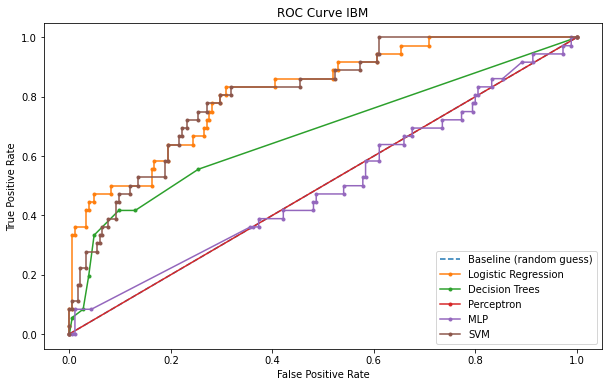

------------------------------------------------------------------------------------------
	 	 	 	 	 ON IBM
------------------------------------------------------------------------------------------
Logistic Regression: Average Accuracy is 0.884929 and standard deviation is 0.028613
Decision Tree: Average Accuracy is 0.870869 and standard deviation is 0.020722
Perceptron: Average Accuracy is 0.838838 and standard deviation is 0.002985
MLP: Average Accuracy is 0.836818 and standard deviation is 0.006891
SVM: Average Accuracy is 0.877899 and standard deviation is 0.025916
------------------------------------------------------------------------------------------


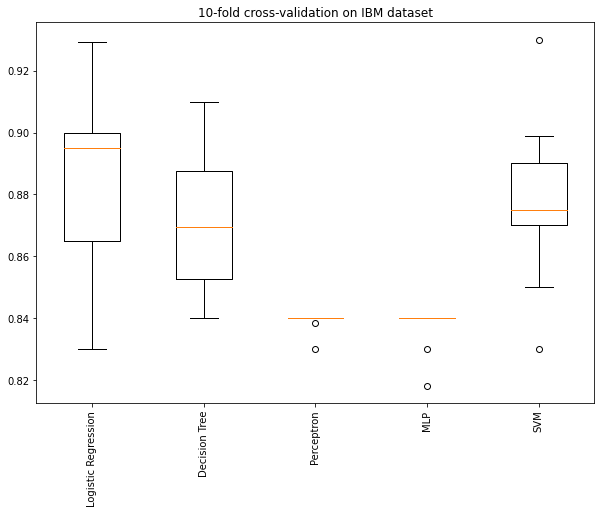

----------------------------------------------------------------------------------------------------
 	 	 	 	 Accuracy Score on IBM
----------------------------------------------------------------------------------------------------
Logistic Regression: on train set = 0.898899, on validation set = 0.860000, on test set = 0.886878
----------------------------------------------------------------------------------------------------
Decision Tree: on train set = 0.881882, on validation set = 0.808000, on test set = 0.837104
----------------------------------------------------------------------------------------------------
Perceptron: on train set = 0.838839, on validation set = 0.840000, on test set = 0.837104
----------------------------------------------------------------------------------------------------
MLP: on train set = 0.838839, on validation set = 0.840000, on test set = 0.837104
---------------------------------------------------------------------------------------------------

In [ ]:
# Performance Metrics for evaluating the performance of the model - ROC, CV, Accuracy score

rocplot(IbmX_test, Ibmy_test, IbmX_train, Ibmy_train, "IBM")
cv(IbmX_train, Ibmy_train, Ibmy_test, "IBM")
accuracy(IbmX_train, Ibmy_train, IbmX_val, Ibmy_val, IbmX_test, Ibmy_test, 'IBM')

**Comments:** The performance of the model improved after the highly correlated columns are removed

**On Mushroom:** Since three of the models gave a 100 percent accuracy, it was decided to not do this step on Mushroom dataset 